In [1]:
import numpy as np
import random
import math
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

In [2]:
class KArmBandit:
    '''
    This class defines the k arm bandit RL problem    
    '''
    def __init__(self, k,armVar = 1,plotAction = False):
        #Number of Arm
        self.k = k
        #Distribution of each arm
        self.armDist = np.random.randn(k)
        self.armVar = armVar
        self.bstArmVal = np.max(self.armDist)
        self.bstArm = np.argmax(self.armDist)
        if plotAction:
            self.plotActionDistribution()
        self.q = self.initializeArm()
        self.armSelectCount = np.zeros(self.k)
    
    def initializeArm(self):
        '''
        To initialize the estimate of  action-values 
        '''
        
        return np.zeros(self.k)
    
    def plotActionDistribution(self):
        '''
        Generete the plot for violen plot if the arm distribution
        '''
        var = np.ones((1,self.k))
        data = np.random.randn(2000, self.k) * var + self.armDist
        plt.figure(figsize=(10,6))
        plt.violinplot(data,showmeans = True,showextrema=True)
        plt.xlabel('Action')
        plt.ylabel('Reward distribution')
        plt.grid(True)
        plt.show()
        
    def updateQ(self,arm):
        '''
        Incremental update the extiamte action values for each arm. To approximate we are using Sample mean
        '''
        self.armSelectCount[arm] +=1
        #sample reward from the arm
        rt = np.random.normal(loc = self.armDist[arm],scale = self.armVar)
        self.q[arm] = self.q[arm] + (1/self.armSelectCount[arm])*(rt - self.q[arm])
        return rt
    
    def selectArm(self,epsilon):
        '''
        Select a arm with epsilon greedy policy
        '''
        #with probabilty of (1-Epsilon) select best arm otherwise select any arm at random
        if random.random()<epsilon: 
            selectedArm = np.random.randint(self.k)
        else : 
            selectedArm = np.argmax(self.q)
        return selectedArm
    
    def UCBSelect(self,c,t):
        '''
        Method to select a arm with UCB method 
        It considers the uncertanity of of the arm and then take a particualy action
        '''
        num = np.full(self.k,np.log(t))
        uncertanity = c * np.sqrt(num/self.armSelectCount)
        selectedArm = np.argmax(self.q + uncertanity)
        return selectedArm
        

In [4]:
# initializing the dictionary
k= 10
var = 1
rewardWithEpsilon = dict()
pctOptimalAction = dict()
errWithEpsilon = dict()

In [5]:
epsilon = [0.0,0.01,0.1]
for ep in epsilon:
    rwdPerTimeStep = np.zeros(1000);
    pctOptActTimeStep = np.zeros(1000);
    errPerTimeStep = np.zeros((1000,k));
    #Run 2K individual bandit problem
    for i in tqdm(range(1,2001)):
        karmBandit = KArmBandit(k, var , False)
        # run 1000 time step of rach problem 
        for j in range(0,1000):
            arm = karmBandit.selectArm(ep)
            reward = karmBandit.updateQ(arm)
            rwdPerTimeStep[j] += reward
            if arm == karmBandit.bstArm:
                pctOptActTimeStep[j] += 1
            errPerTimeStep[j] += abs(karmBandit.q-karmBandit.armDist)
    rwdPerTimeStep /= i
    pctOptActTimeStep = (pctOptActTimeStep/i) *100 
    errPerTimeStep = errPerTimeStep/i
    #filling dict of data
    rewardWithEpsilon[ep] = rwdPerTimeStep
    pctOptimalAction[ep] = pctOptActTimeStep
    errWithEpsilon[ep] = errPerTimeStep

In [6]:
'''
This selection of code where epsilon is decayed in such a way that it follows eq 2.7 of the book 
'''
rwdPerTimeStep = np.zeros(1000);
pctOptActTimeStep = np.zeros(1000);
errPerTimeStep = np.zeros((1000,k));
#Run 2K individual bandit problem
for i in tqdm(range(1,2001)):
    karmBandit = KArmBandit(k, var , False)
    # run 1000 time step of rach problem 
    for j in range(0,1000):
        arm = karmBandit.selectArm((1/(j+1)))
        reward = karmBandit.updateQ(arm)
        rwdPerTimeStep[j] += reward
        if arm == karmBandit.bstArm:
            pctOptActTimeStep[j] += 1
        errPerTimeStep[j] += abs(karmBandit.q-karmBandit.armDist)
rwdPerTimeStep /= i
pctOptActTimeStep = (pctOptActTimeStep/i) *100 
errPerTimeStep = errPerTimeStep/i
#filling dict of data
rewardWithEpsilon[1] = rwdPerTimeStep
pctOptimalAction[1] = pctOptActTimeStep
errWithEpsilon[1] = errPerTimeStep

In [7]:
'''
This selection of code where epsilon is decayed in such a way that it gives better performance then other
'''
einit = 0.1
eend = 0.001
rwdPerTimeStep = np.zeros(1000);
pctOptActTimeStep = np.zeros(1000);
errPerTimeStep = np.zeros((1000,k));
#Run 2K individual bandit problem
for i in tqdm(range(1,2001)):
    karmBandit = KArmBandit(k, var , False)
    # run 1000 time step of rach problem 
    for j in range(0,1000):
        r = max(((1000-j)/1000),0)
        ep = r * (einit-eend) + eend
        arm = karmBandit.selectArm(ep)
        reward = karmBandit.updateQ(arm)
        rwdPerTimeStep[j] += reward
        if arm == karmBandit.bstArm:
            pctOptActTimeStep[j] += 1
        errPerTimeStep[j] += abs(karmBandit.q-karmBandit.armDist)
rwdPerTimeStep /= i
pctOptActTimeStep = (pctOptActTimeStep/i) *100 
errPerTimeStep = errPerTimeStep/i
#filling dict of data
rewardWithEpsilon[0.6] = rwdPerTimeStep
pctOptimalAction[0.6] = pctOptActTimeStep
errWithEpsilon[0.6] = errPerTimeStep

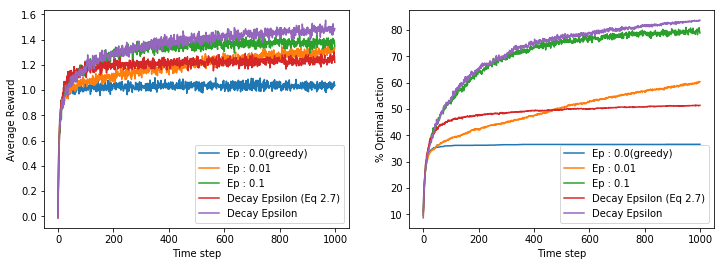

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,4))

#ax1.plot(errWithEpsilon[epsilon[plti]][:,ki], label='Arm'+str(ki+1))
ax1.plot(rewardWithEpsilon[0.0], label='Ep : 0.0(greedy)')
ax1.plot(rewardWithEpsilon[0.01],label='Ep : 0.01')
ax1.plot(rewardWithEpsilon[0.1], label='Ep : 0.1')
ax1.plot(rewardWithEpsilon[1], label='Decay Epsilon (Eq 2.7)')
ax1.plot(rewardWithEpsilon[0.6], label='Decay Epsilon')
ax1.legend()
ax1.set(xlabel='Time step', ylabel='Average Reward')

ax2.plot(pctOptimalAction[0.0], label='Ep : 0.0(greedy)')
ax2.plot(pctOptimalAction[0.01],label='Ep : 0.01')
ax2.plot(pctOptimalAction[0.1], label='Ep : 0.1')
ax2.plot(pctOptimalAction[1], label='Decay Epsilon (Eq 2.7)')
ax2.plot(pctOptimalAction[0.6], label='Decay Epsilon')
ax2.legend()
ax2.set(xlabel='Time step', ylabel='% Optimal action')

plt.show()

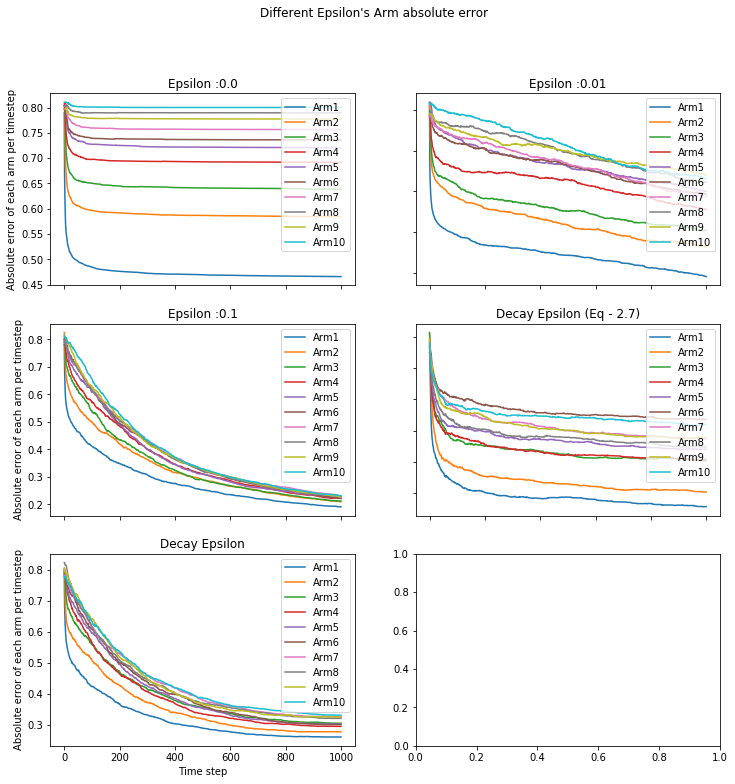

In [9]:
plotEpsilon = [0.0,0.01,0.1,1,0.6]
fig, ax = plt.subplots(3, 2,figsize=(12,12))
fig.suptitle('Different Epsilon\'s Arm absolute error')
epi = 0
for i in range(3):
    for j in range(2):
        if i == 2 and j == 1:
            break;
        for ki in range(k):
            ax[i,j].plot(errWithEpsilon[plotEpsilon[epi]][:,ki], label='Arm'+str(ki+1))
        ax[i,j].legend(loc="upper right")
        if epi == 3:
            ax[i,j].set_title('Decay Epsilon (Eq - 2.7)')
        elif epi ==4:
            ax[i,j].set_title('Decay Epsilon')
        else:
            ax[i,j].set_title('Epsilon :' + str(plotEpsilon[epi]))
        ax[i,j].set(xlabel='Time step', ylabel='Absolute error of each arm per timestep')
        ax[i,j].label_outer()
        epi += 1
        
plt.show()

In [7]:
cvalues = [1,2,4]
for c in cvalues:
    rwdPerTimeStep = np.zeros(1000);
    pctOptActTimeStep = np.zeros(1000);
    errPerTimeStep = np.zeros((1000,k));
    # Run 2K individual bandit problem
    for i in tqdm(range(1,2001)):
        karmBandit = KArmBandit(k, 1 , False)
        # run 1000 time step of rach problem 
        for j in range(0,1000):
            arm = karmBandit.UCBSelect(c,j+1)
            reward = karmBandit.updateQ(arm)
            rwdPerTimeStep[j] += reward
            if arm == karmBandit.bstArm:
                pctOptActTimeStep[j] += 1
            errPerTimeStep[j] += abs(karmBandit.q-karmBandit.armDist)
    rwdPerTimeStep /= i
    pctOptActTimeStep = (pctOptActTimeStep/i) *100 
    errPerTimeStep = errPerTimeStep/i
    #filling dict of data
    rewardWithEpsilon[c] = rwdPerTimeStep
    pctOptimalAction[c] = pctOptActTimeStep
    errWithEpsilon[c] = errPerTimeStep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide


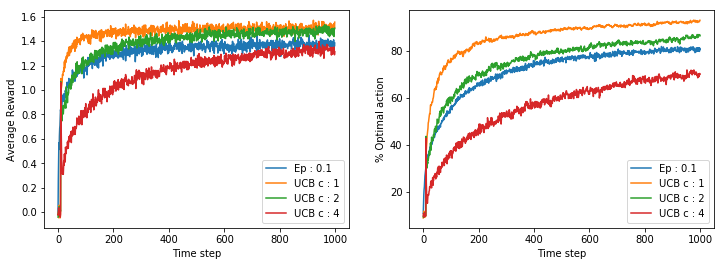

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.plot(rewardWithEpsilon[0.1], label='Ep : 0.1')
ax1.plot(rewardWithEpsilon[1], label='UCB c : 1')
ax1.plot(rewardWithEpsilon[2],label='UCB c : 2')
ax1.plot(rewardWithEpsilon[4],label='UCB c : 4')
ax1.legend()
ax1.set(xlabel='Time step', ylabel='Average Reward')

ax2.plot(pctOptimalAction[0.1], label='Ep : 0.1')
ax2.plot(pctOptimalAction[1], label='UCB c : 1')
ax2.plot(pctOptimalAction[2],label='UCB c : 2')
ax2.plot(pctOptimalAction[4],label='UCB c : 4')
ax2.legend()
ax2.set(xlabel='Time step', ylabel='% Optimal action')

plt.show()

In [9]:
# plt.figure(figsize=(8,6))
# plt.plot(rewardWithEpsilon[2], label='UCB c :2')
# # plt.plot(rewardWithEpsilon[0.01],label='Ep : 0.01')
# # plt.plot(rewardWithEpsilon[0.1], label='Ep : 0.1')
# plt.xlabel('Time step')
# plt.ylabel('Average Reward')
# plt.yticks(np.arange(0, 1.8, step=0.4))
# plt.legend()
# plt.show()

# plt.figure(figsize=(8,5))
# plt.plot(pctOptimalAction[0.0], label='Ep : 0.0(greedy)')
# plt.plot(pctOptimalAction[0.01],label='Ep : 0.01')
# plt.plot(pctOptimalAction[0.1], label='Ep : 0.1')
# plt.xlabel('Time step')
# plt.ylabel('Average Reward')
# plt.yticks(np.arange(0, 100, step=20))
# plt.legend()
# plt.show()